# Wyjaśnialność modeli - XAI - tutorial 
## Wstęp
Rozwój uczenia maszynowego oraz większe moce obliczeniowe, którymi dzisiaj dysponujemy doprowadziły do powstania modeli z ilością parametrów niemozliwą do objęcią umysłem przez człowieka, wciąż jednak potrzebujemy rozumiec działanie modeli. Zadanie to, łatwe gdy myślimy o regresji liniowej, gdzie przyrost zmiennej objaśniającej o jednostkę powoduje liniowy wzrost zmiennej odpowiedzi o wartość współczynnika przeradza się w poważne wyzwanie gdy chcemy zrozumieć wpływ danego piksela na sieć neuronową klasyfikującą obrazy, która ma miliony parametrów. 

To wyzwanie oczywiście musimy podjąć z kilku przyczyn. Pierwszą z nich jest biznesowa konieczność zrozumienia działania modelu. Jeśli mamy w zamiarze wykorzystywać model do wspierania decyzji o biznesowym znaczeniu, musimy rozumieć dlaczego predykcje dawane przez nasz model są takie a nie inne. Zwiększa do także zaufanie docelowych użytkowników modelu. Kolejną ważną kwestia jest debugowanie modelu. Wyjaśnialność mówi nam jakie cechy powodują że predykcje sa jakie są, a to pozwala nam rozwiązać ewentualne niewłaściwe działanie modelu.


W tym module pochylimy się nad kwestią wyjaśnialności modeli uczenia maszynowego.

## Modele white box i black box
Modele uczenie maszynowego możemy podzielić na modele czarnopudełkowe (ang. *black box*) oraz modele białopudełkowe (ang. *white box*). Podstawową różnicą między modelami czarnopudełkowymi a tymi biało jest nasza zdolność wejrzenia w wewnętrzności modelu. W przypadku modelu białopudełkowego łatwo możemy zrozumieć co w danym modelu odpowiada za taką a nie inną predykcję. Dobrym przykładem moga być współczynniki w regresji liniowej, gdzie wzrost o jednostkę zmiennej objaśniającej powoduje wzrost przedykcji o wartość współczynnika przy wspomnianej zmiennej objaśniającej.
Bardziej obrazowo wyobraźmy sobie prosty model regresji linowej prognozujący cenę m<sup>2</sup> mieszkania w zalezności od odległości od centrum. Jeżeli współczynnik przy odległości od centrum to -300, wtedy przyw zroście odległości o kilometr prognoza ceny spadnie o 300 zł. W modelu białopudełkowym widzimy dokładnie jak jego elementy wpływaja na ostateczną predykcję.
![title](white_box_nb.png)
<center>Na rysunku przedstawiono schemat modelu <i>white box</i>. Jego wewnętrzności są dla nas przejrzyste, stąd nazwa.</center>

Przejdźmy teraz do modelu czarnopudełkowych. Podstawową różnicą między nimi a omawianymi uprzednio modelami białopudełkowymi jest brak łatwego wejrzenia w wenętrzne działanie modelu czarnopudełkowego. Niekoniecznie chodzi tutaj o brak teoretycznego zrozumienia działania owego czarnopudełkowego, a raczej o brak wyjaśnienia jak współczynniki wpływaja na końcowe predykcje. Mamy zatem dane na wejściu, mamy prognoze na wyjściu, ale nie wiemy co jest w środku naszego pudełka.

![title](black_box_nb.png)
<center>Na rysunku przedstawiono schemat modelu <i>white box</i>. Jego wewnętrzności są zasłonięte przed naszym wejrzeniem, stąd nazwa.</center>
<div class="alert alert-block alert-danger">
<b>Uwaga!</b> 
    
Warto podkreślić że, gdy myślimy o modelach biało i czarnopudełkowych, nie mamy na myśli dwóch rozłącznych kategorii, a raczej kontinuum wyjaśnialności, od bardziej białych łatwo wyjasnialnych modeli, do tych bardziej czarnych, trudnych w wyjaśnieniu 
</div>

![title](comp_bl_wh.png)
<center>Na rysunku widzimy schematyczne przedstaweinie kontinuum czarnopudełkowości modelu w data science.</center>

Przejdźmy do przykładowych modeli, które możemy zaklasyfikowac do grupy czarno lub biało pudełkowych. Najbardziej znane i czesto używane znajdziemy w tabeli poniżej. Jak możemy zobaczyć wśród obu typów modeli o których mówimy w tym rozdziale znajdziemy zarówno klasyfikatory jak i regresory. 

| Modele białopudełkowe |  Modele czarnopudełkowe  |
|:---------------------:|:------------------------:|
| Regresja liniowa      | Maszyna wektorów nośnych |
| Regresja logistyczna  | Sieć neuronowa           |
| Drzewo decyzyjne      | Drzewa wzmacniane        |
|                       | Las losowy               |


## Wyjaśnialność

W poprzednim rozdziale wprowadziliśmy podział na modele czarno i biało pudełkowo. O ile w przypadku modeli białopudełkowych tak jak juz wspomniano wyjasnienie predykcji otrzymywanych przez model nie jest problematyczne o tyle dla modeli czarnopudełkowych zastosowanie metod wyjaśnialności jest konieczne dla zrozumienia i interpretacji modelu.
Gdy mówimy o wyjasnialności powinniśmy rozróżnić jej dwa rodzaje. Pierwszym jej typem jest wyjaśnialność lokalna - chcemy wiedzieć jakie cechy powodują określoną wartość predykcji, kolejnymi są wyjaśnialność kohorty czyli wyjaśnienia dla podzbioru danych cechujących się określoną charakterystyką zaś ostatnim wyjaśnialność globalna, gdzie chcemy ogólne znaczenie cech na przestrzeni wszystkich predykcji. Zobarazujmy tą różnice na ilustracji. Wyobraźmy że stworzylismy model . Niebieskim otoczono wszystkie przypadki - ich dotyczy wyjasnialność globalna. Na fioletowo zaznaczono jedna subklasę - jej dotyczyłaby wyjaśnialność kohorty, a na żółto pojedynczy przypadek stylokoloru 

![title](exp.png)
<center>Schemat wyjasnialność globalna/kohorty/lokalna</center>

Na początku przyjrzymy się metodą globalnej wyjaśnialności

## Wykres cząstkowej zależności (ang. *partial dependence plot*)

Wykres cząstkowej zależności pokazuje nam marginalny wpływ jednej bądź też dwóch zmiennych na prognozowany wynik modelu uczenia maszynowego. Tego typu wykres pozwala nam zwizualizowac relację pomiędzy zmienną celu a predyktorami. 

### Demonstracja na przykładowym zbiorze
Dzaiłanie wykresu cząstkowej zależności sprawdzimy na wbudowanym w pakiet scikit-learn zbiorze *California housing*, który zawiera dane z amerykańskiego spisu powszechnego z roku 1990. Dane są na poziomie bloku - najmniejszej geograficznej jesdostki dla której amerykański urząd stastystyczny publikuje próbki danych. Taki blok zazwyczaj zmieszkuje w granicach 600 do 3000 osób. 

W zbiorze mamy nastepujące zmienne objaśniające:
* **MedInc** mediana dochodu w bloku
* **HouseAge** mediana wieku domu w bloku
* **AveRooms** średnia ilość pokojów na gospodarstwo domowe
* **AveBedrms** średnia ilość sypialni na gospodarstwo domowe
* **AveOccup** średnia ilość członków gospodarstwa domowego
* **Latitude** szerokość geograficzna 
* **Longitude** długość geograficzna

a zmienną przewidywaną jest mediana wartości domu w bloku wyrażona w setkach tysięcy dolarów

Przygotujmy dane:

In [2]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split


cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

Prezentują sie one w następujący sposób

In [3]:
X_train.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
2255   3.1250      16.0  5.380071   1.058201      3407.0  3.004409     36.80   
17341  2.0508      11.0  4.993884   1.064220       504.0  1.541284     34.86   
11589  5.1061      26.0  6.714765   1.013423       836.0  2.805369     33.78   
13635  2.3750      38.0  4.307065   0.937500      1347.0  3.660326     34.09   
693    2.1552      23.0  3.812641   1.040632       828.0  1.869074     37.70   

       Longitude  
2255     -119.83  
17341    -120.40  
11589    -118.03  
13635    -117.32  
693      -122.11

In [4]:
y_train[:5]

array([0.808, 2.75 , 2.575, 0.753, 1.614])

Następnie stwórzmy nieinterpretowalny model. Wykorzystamy sieci neuronowe.

In [5]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor

pipe = Pipeline([('qtran', QuantileTransformer()), ('mlpreg', MLPRegressor(
        hidden_layer_sizes=(50, 50), learning_rate_init=0.01, early_stopping=True
    ))])

pipe.fit(X_train, y_train)

Pipeline(steps=[('qtran', QuantileTransformer()),
                ('mlpreg',
                 MLPRegressor(early_stopping=True, hidden_layer_sizes=(50, 50),
                              learning_rate_init=0.01))])

In [6]:
from sklearn.metrics import mean_squared_error

pred = pipe.predict(X_test)

print(f'Błąd średniokwadratowy dla modelu sieci neuronowej to {mean_squared_error(pred, y_test):.2f}')

Błąd średniokwadratowy dla modelu sieci neuronowej to 0.27


In [7]:
import numpy as np
import plotly.graph_objects as go

unique_vals = sorted(np.unique(X_train['HouseAge'].values))
X_train_copy = X_train.copy(deep=True)
y = []
for val in unique_vals:
    X_train_copy['HouseAge'] = val
    y.append(np.average(pipe.predict(X_train_copy)))

scatter = go.Scatter(x=unique_vals, y=y)

fig = go.FigureWidget(data=[scatter], layout=go.Layout(title={'text': 'Wykres cząstkowej zależności'},
                                                 xaxis={'title': 'Wiek domu'}, yaxis={'title': 'Wartość domu'}))

fig.show()

Na wykresie widzimy że według wykresu cząstkowej zależności wiek domu dodatnio wpływa na jego wartość
Wykres cząstkowej zalezności pozwala nam na bardzo intuicyjne zwizualizowanie zależności predykowanych przez nasz model.
Ma też jednak swoje wady, naczelną z nich jest założenie o niezalezności zmiennej objasniającej. W rzeczywistości niekoniecznie tak może być. Na przykład w miejscach o okreslonej szerokości i długości geograficznej może nie być zadnego nowego budownictwa. Wielkość domu może być skorelowana z jego wiekiem. Widzimy zatem, że do wykresów cząstkowej zależności trzeba podchodzic z pewną rezerwą.


## Local interpretable model-agnostic explanation (LIME)
Przejdźmy teraz do kolejnej metody objaśniania modeli. Tym razem użyjemy metody LIME. Jest to metoda lokalnego objaśniania modeli, która wyjaśnia przyczyny otrzymania takiej prognozy dla określonego punktu. Metoda LIME opiera się o modele zastępcze. Oznacza to że w otoczeniu punktu który chcelibyśmy wyjaśnić generujemy dodatkowe punkty i uczymy na nich prostszy interpetowalny model, czyli np. regrsję wielomianową, bądź też drzewo decyzyjne, który wyjaśni nam lokalne działanie naszego modelu, czyli będzie *lokalnie wierny*.

Przepis na trenowanie lokalnych modeli pomocniczych wygląda nastepująco
* wybranie przypadku dla którego chcielibysmy wyjasnić prognozy modelu czarnopudełkowego
* wygeneruj nowe punkty w pobliżu punktu x
* wyznacz wagi dla nowych punktów w zalezności od ich odległości
* wytenoważ ważony interpretowalny model na zbiorze danych z wylosowanymi punktami
* objaśnij predykcje iterpretując lokalny model 

Dobrze to ilustruje wykres zamieszczony za [Interpretable Machine Learning](christophm.github.io/interpretable-ml-book) Christopha Molnara.

![title](lime.png)

Problem przedstawiony na wykresie powyżej to problem klasyfikacji binarnej ze złożoną granicą decyzji oddzielającą od siebie kategorie.
Na podwykresie A widzimy wspomiana granice decyzyjną. W kroku B generujemy losowe punkty. W korku C nadajemy im wagi odpowiednie do odległośc od punktu dla którego szukamy wyjasnienia (żółty punkty). W D widzimy wynik działania LIME - wierny lokalnie model liniowy objaśniający predykcje.

### Przykład

Przejdźmy teraz do przykładu uzycia LIME. Spróbujemy wyznaczyć wyjaśnienia prognoz dla problemu klasyfikacji zdjęć, korzystająć ze zbioru danych cifar 10 wbudowanego w pakiet służący do budowy m.in sieci neuronowych keras.
Cifar 10 zawiera 60 tysięcy zdjęć z 10 klas, po 6 tysięcy na klasę. Zbiór jest podzielony na trening (50 tysięcy zdjęć) oraz test (10 tysięcy zdjęć). Wśród nich mamy następujące klasy: samolot, samochód, ptak, kot, sarna, pies, żaba, koń,statek, ciężarówka.
Stwórzmy wpierw obiekty z danymi.

In [8]:
from tensorflow.keras.datasets import cifar10
from tensorflow import keras
(X_train, y_train), (X_test, y_test) = cifar10.load_data() # ładujemy dane

d:\ProgramData\Anaconda3\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

d:\ProgramData\Anaconda3\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

d:\ProgramData\Anaconda3\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

d:\ProgramData\Anaconda3\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be un

In [9]:
cifar_10_cats_dict = {0: 'samolot',
                      1: 'samochód',
                      2: 'ptak',
                      3: 'kot',
                      4: 'sarna',
                      5: 'pies',
                      6: 'żaba',
                      7: 'koń',
                      8: 'statek',
                      9: 'ciężarówka'}

Zobaczmy jak wygląda przykładowy obraz ze zbioru danych

 Na wykresie mamy zdjęcie kategorii: ciężarówka



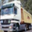

In [10]:
import plotly.express as px
print(f' Na wykresie mamy zdjęcie kategorii: {cifar_10_cats_dict[y_train[1][0]]}')
fig = px.imshow(X_train[1], width = 400, height = 400)
fig.show()

Przygotujmy dane do uczenia modelu

In [11]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [12]:
y_train = keras.utils.to_categorical(y_train, 10) # mamy 10 kategorii
y_test = keras.utils.to_categorical(y_test, 10)

Uczymy model. Używamy sekwencyjnego API kerasa w celu wyuczenia [konwolucyjnej sieci neuronowej](https://medium.com/@RaghavPrabhu/understanding-of-convolutional-neural-network-cnn-deep-learning-99760835f148) 

In [13]:
model = keras.Sequential(
    [keras.Input(shape=(32, 32, 3)),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation="softmax"),
     ]) # definicja modelu

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose = 0); # trening modelu

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
45000/45000 [==============================] - 49s 1ms/sample - loss: 1.7256 - acc: 0.3644 - val_loss: 1.4171 - val_acc: 0.4840
Epoch 2/15
45000/45000 [==============================] - 48s 1ms/sample - loss: 1.3645 - acc: 0.5097 - val_loss: 1.2317 - val_acc: 0.5688
Epoch 3/15
45000/45000 [==============================] - 49s 1ms/sample - loss: 1.2243 - acc: 0.5656 - val_loss: 1.1159 - val_acc: 0.6122
Epoch 4/15
45000/45000 [==============================] - 49s 1ms/sample - loss: 1.1098 - acc: 0.6062 - val_loss: 0.9956 - val_acc: 0.6530
Epoch 5/15
45000/45000 [==============================] - 49s 1ms/sample - loss: 1.0227 - acc: 0.6371 - val_loss: 0.9153 - val_acc: 0.6876
Epoch 6/15
45000/45000 [==============================] - 49s 1ms/sample - loss: 0.9586 - acc: 0.6620 - val_loss: 0.8680 - val_acc: 0.6926
Epoch 7/15
45000/45000 [==============================] - 49s 1ms/sample - loss: 0.9062 - acc: 0.6820 - val_loss: 0.7

In [15]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Strata modelu wyniosła {score[0]:.2f}')
print(f'Skuteczność modelu wyniosła {score[1]:.2f}')

Strata modelu wyniosła 0.72
Skuteczność modelu wyniosła 0.75


Zobaczmy przykładową predykcję dla obrazu testowego

Na wykresie mamy zdjęcie kategorii: statek
Prognoza to statek z prawdopodobieństwem 0.84



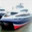

In [16]:
print(f'Na wykresie mamy zdjęcie kategorii: {cifar_10_cats_dict[np.argmax(y_test[1])]}')
prediction = model.predict(np.expand_dims(X_test[1], axis = 0)) # predict spodziewa się batcha, zminiamy wymiar
prob = np.max(prediction)
index = np.argmax(prediction)
print(f'Prognoza to {cifar_10_cats_dict[index]} z prawdopodobieństwem {prob:.2f}')
fig = px.imshow(X_test[1], width = 400, height = 400)
fig.show()

Otrzymujemy poprawną predykcję statku

Wykorzystajmy metode wyjasniania predykcji LIME do zdiagnozowania co przyczyniło się do takiej, a niej innej prognozy

In [1]:
from lime.wrappers.scikit_image import SegmentationAlgorithm

from lime import lime_image

explainer = lime_image.LimeImageExplainer(random_state=0)


segmentation_fn = SegmentationAlgorithm('quickshift', kernel_size=2,
                                        max_dist=5, ratio=0.2,
                                        random_seed=0)

explanation = explainer.explain_instance(X_test[1].astype('double'), model.predict,
                                         top_labels=3, num_samples=100, segmentation_fn=segmentation_fn)

NameError: name 'X_test' is not defined

Zwizualizujmy wyniki działania wyjaśniarki. Na wykresach widzimy z lewej piksele które przyczyniły się do predykcji statku, natomaist z lewej te które obniżały prawdopodbieństwo tego że mamy do czynienia ze statkiem.

In [18]:
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries

temp_1, mask_1 = explanation.get_image_and_mask(
    explanation.top_labels[0], positive_only=True, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(
    explanation.top_labels[0], positive_only=False, negative_only=True, num_features=10, hide_rest=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2));

### Podsumowanie
Wyjaśnialność pozwala nam zrozumiec czym kieruje się model w swoich decyzjach, co jest kluczowe dla oceny poprawności tych decyzji. W przedstawionym przykładzie użylismy obrazów ale LIME jest wszechstronną metoda używaną także do wyjasniania.
Jakie są jej korzyści? Ważna jest to że nie jest ona inherentna dla konkretnego modelu, lecz agnostyczna wobec modelu którego używamy. W efekcie w przypadku zmiany modelu wyjaśniarka oparta o LIME wciąż będzie działała.
Oprócz niewątpilwych zalet LIME ma także wady, którymi jest niestabilność oraz metoda próbkowania nie uwzględniająca korelacji między zmiennymi objaśniającymi.

## Shap
Data science jest szeroką dziedziną w której zastosowanie znajdują liczne dziedziny matematyki. Jedną z dziedzin matematyki, która jest powszechnie stosowana jest teoria gier. Właśnie z teorii gier wywodzi się metoda wyjaśniania o której opowiemy w tym dziale. 

### Implementacja

Metodą uczenia maszynowego opartą o wartości Shapleya do wyjaśniania wpływu zmiennych na predykcje jest SHAP (SHapley Additive EXplanation). AUtorzy algorytmu zaproponowali metodę estymacji wartości SHAP oraz metody globalnej iterpretacji oparte o agregacje wartości Shapleya.
Pakietem implementującym SHAP w pythonie jest shap.
Zobaczmy działanie shap na przykładzie danych tabularycznych, używanym już uprzednio *California Housing Dataset*

In [19]:
import shap

Wgrajmy jeszcze raz i podzielmy na test i trening zbiór danych *california housing data*. Tym razem stworzymy model drzew wzmacnianych Light Gradient Boosting Machine i wyjaśnimy jego predykcje za pomocą shap. 

In [20]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split


cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [21]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from lightgbm import LGBMRegressor

lgb_reg = LGBMRegressor() # używamy domyślnych parametów

lgb_reg.fit(X_train, y_train)

LGBMRegressor()

In [22]:
from sklearn.metrics import mean_squared_error

pred = lgb_reg.predict(X_test)

print(f'Błąd średniokwadratowy dla modelu LightGBM to {mean_squared_error(pred, y_test):.2f}')


Błąd średniokwadratowy dla modelu LightGBM to 0.21


Zwizualizujmy wyniki dla przykładowego rekordu.

In [23]:
explainer = shap.TreeExplainer(lgb_reg)
shap_values = explainer.shap_values(X_train)

W ten sposób prezentują sie rzeczywiste dane dla przykładu, dla które chcemy stworzyć wyjasnienie

In [24]:
X_train.iloc[0]

MedInc           3.125000
HouseAge        16.000000
AveRooms         5.380071
AveBedrms        1.058201
Population    3407.000000
AveOccup         3.004409
Latitude        36.800000
Longitude     -119.830000
Name: 2255, dtype: float64

In [25]:
y_test[0]

1.369

In [26]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_train.iloc[0])

Na wykresie widzimy istotne znaczenie jakie ma położenie geograficzne dla wartości mieszkania. Otrzymaliśmy proste do zrozumienia wyjasnienie czarnopudełkowego modelu. 
Shap pozwala nam także na zrozumienie globalnego znaczenia zmiennych. Jesto wyliczane w prosty sposób, jako średnia wartości Shapleya dla poszczególnych rekordów dla danej cechy

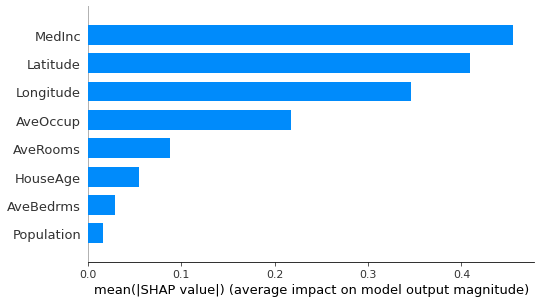

In [27]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

Na wykresie widzimy cechy mające największa wagę dla cen nieruchomości. W naszym przypadku będzie to dochód oraz położenie. Populacja zaś nie ma szczególnego wpływu na wartość mieszkania wg naszego modelu Light GBM.

### Podsumowanie
Shap jest najbardziej dojrzałym z algorytmów wyjaśniania, jest mocno zakorzeniony w teorii gier i ma silne podstawy teoretyczne. Jest to wskazana metoda wyjaśniania modeli. Kolejną zaleta jest możliwość uzyskania wyjaśnień globalnych.

## Zakończenie
Wyjaśnialność jest istotnym i rozwijającym się tematem w dziedzinie uczenie maszynowego. Nie ma w tym nic dziwnego. W czasach gdy sztuczna inteligencja automatyzuje coraz liczenijsze elemnty naszego życia, a prognozy przez nią dawane mają wielkie znaczenie, musimy je rozumieć żeby budować zaufanie do tychże metod.